# 分位数法

In [21]:
# 设置matplotlib显示中文
import matplotlib.font_manager as font_manager
font_path = ('/System/Library/Fonts/STHeiti Light.ttc')
my_font = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = my_font.get_name()
plt.rcParams['axes.unicode_minus'] = False

原始数据:
            值
0   54.967142
1   48.617357
2   56.476885
3   65.230299
4   47.658466
5   47.658630
6   65.792128
7   57.674347
8   45.305256
9   55.425600
10  45.365823
11  45.342702
12  52.419623
13  30.867198
14  32.750822
15  44.377125
16  39.871689
17  90.000000
18   5.000000
19  95.000000


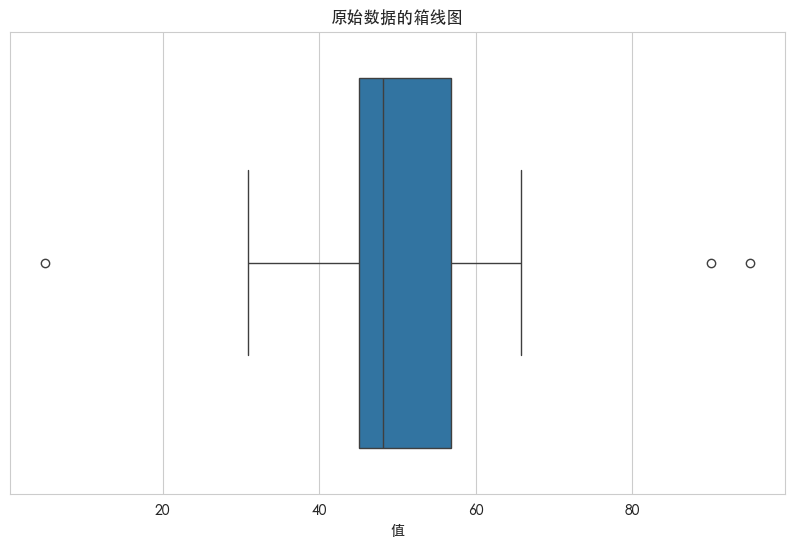


分位数统计:
Q1 (25%分位数): 45.07
Q3 (75%分位数): 56.78
IQR (四分位距): 11.70
下界: Q1 - 1.5*IQR = 27.52
上界: Q3 + 1.5*IQR = 74.33

检测到的异常值:
       值
17  90.0
18   5.0
19  95.0

方法1 - 删除异常值后的数据:
            值
0   54.967142
1   48.617357
2   56.476885
3   65.230299
4   47.658466
5   47.658630
6   65.792128
7   57.674347
8   45.305256
9   55.425600
10  45.365823
11  45.342702
12  52.419623
13  30.867198
14  32.750822
15  44.377125
16  39.871689


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置随机种子以确保结果可重现
np.random.seed(42)

# 生成20个随机样本，其中包含一些异常值
data = np.random.normal(loc=50, scale=10, size=17)
# 添加3个异常值
outliers = np.array([90, 5, 95])
#concatenate((a1, a2, ...), axis=0,
all_data = np.concatenate([data, outliers])

# 创建DataFrame以便于分析
df = pd.DataFrame({'值': all_data})

# 显示原始数据
print("原始数据:")
print(df)


# 绘制原始数据的箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['值'])
plt.title('原始数据的箱线图')
plt.show()

# 计算分位数
#quantile calculation is done using pandas.quantile() function different with normal quantile calculation.
Q1 = df['值'].quantile(0.25)
Q3 = df['值'].quantile(0.75)
IQR = Q3 - Q1

# 定义异常值的界限
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\n分位数统计:")
print(f"Q1 (25%分位数): {Q1:.2f}")
print(f"Q3 (75%分位数): {Q3:.2f}")
print(f"IQR (四分位距): {IQR:.2f}")
print(f"下界: Q1 - 1.5*IQR = {lower_bound:.2f}")
print(f"上界: Q3 + 1.5*IQR = {upper_bound:.2f}")

# 识别异常值
outliers = df[(df['值'] < lower_bound) | (df['值'] > upper_bound)]
print(f"\n检测到的异常值:")
print(outliers)

# 处理异常值 - 方法1：删除
df_removed = df[(df['值'] >= lower_bound) & (df['值'] <= upper_bound)]
print(f"\n方法1 - 删除异常值后的数据:")
print(df_removed)




In [1]:
import numpy as np

data = [1, 2, 5, 7, 8, 9, 10, 11, 13, 50]  # 50 is an outlier

Q1 = np.percentile(data, 25)   # 5.5
Q3 = np.percentile(data, 75)   # 10.75
IQR = Q3 - Q1                  # 5.25

lower_bound = Q1 - 1.5 * IQR   # -2.375
upper_bound = Q3 + 1.5 * IQR   # 18.625

outliers = [x for x in data if x < lower_bound or x > upper_bound]
print(outliers)  # Output: [50]
print(Q1, Q3, IQR, lower_bound, upper_bound)


[50]
5.5 10.75 5.25 -2.375 18.625


# Z-score 经过标准化后的绝对值大于了某个阈值，就是异常值

In [16]:
from scipy.stats import zscore
import numpy as np

data = np.array([1, 2, 5, 7, 8, 9, 10, 11, 13, 50,1000])

z_scores = zscore(data)
#Choose a threshold (commonly 3, or 2.5 for stricter/looser criteria).
outliers = data[np.abs(z_scores) > 3]
print(outliers)  # Output: [50]


[1000]


# DBSCAN 密度聚类

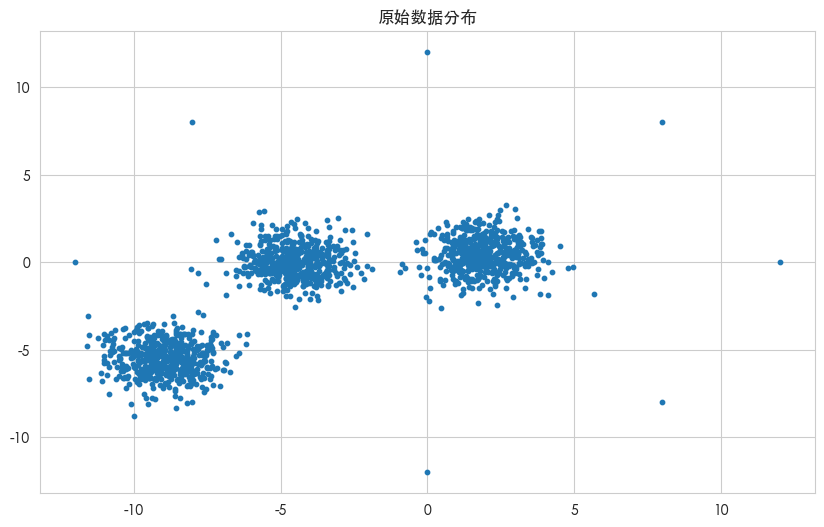

DBSCAN检测到的异常值数量: 58
异常值占比: 3.85%


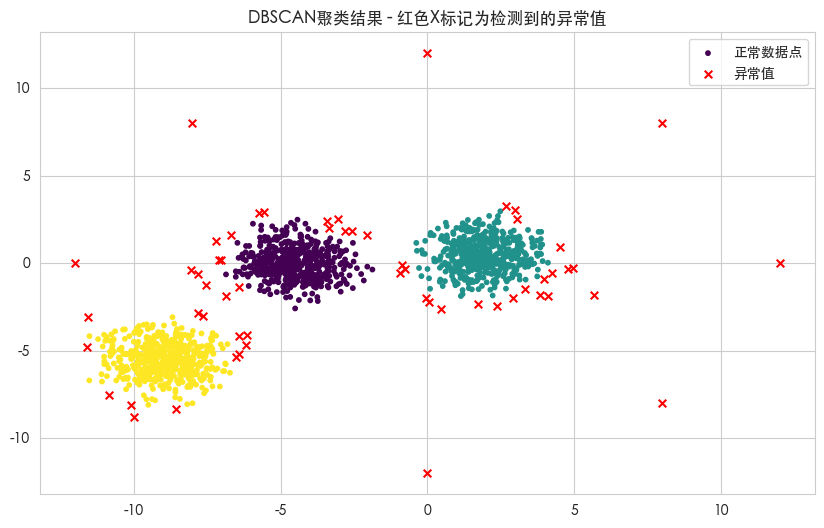


移除异常值后的数据形状: (1450, 2)
原始数据形状: (1508, 2)


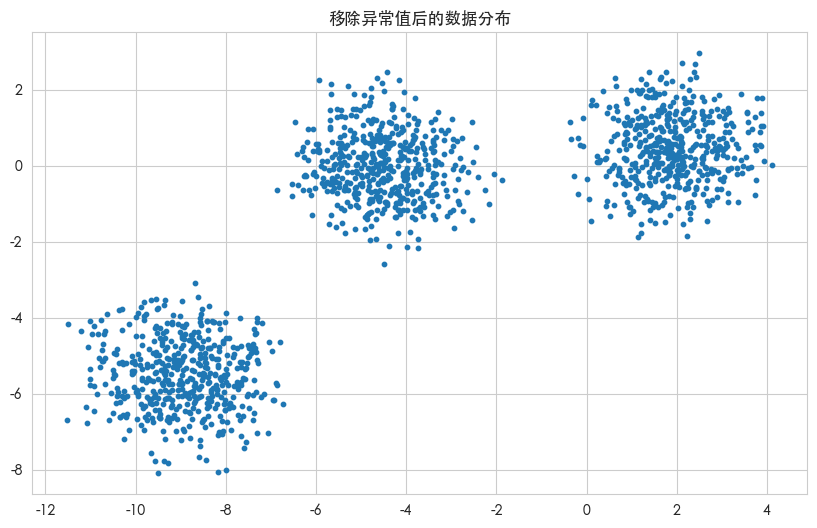

In [44]:
# 使用DBSCAN密度聚类进行异常值检测
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 生成随机数据
n_samples = 1500
random_state = 170
# make_blobs:Generate isotropic Gaussian blobs for clustering.
X, _ = make_blobs(n_samples=n_samples, random_state=random_state)

# 添加一些离群点
#np.vstack: Stack arrays in sequence vertically (row wise).
X = np.vstack([X, np.array([[8, 8], [-8, -8], [8, -8], [-8, 8], [12, 0], [-12, 0], [0, 12], [0, -12]])])

# 将数据转换为DataFrame以便于处理
df_dbscan = pd.DataFrame(X, columns=['x', 'y'])

# 绘制原始数据
plt.figure(figsize=(10, 6))
# s means marker size
plt.scatter(df_dbscan['x'], df_dbscan['y'], s=10)
plt.title('原始数据分布')
plt.grid(True)
plt.show()

"""

eps : float, default=0.5
    The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

min_samples : int, default=5
    The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself. If min_samples is set to a higher value, DBSCAN will find denser clusters, whereas if it is set to a lower value, the found clusters will be more sparse.
"""
# 使用DBSCAN进行聚类
# eps: 邻域半径，min_samples: 成为核心点所需的最小样本数
# eps define the maximum distance can be viewed as a neighbor(any larger than the eps will be considered as noise; the smaller the eps, the more outlier points will be detected)., min_samples define the minimum number of samples required to be a core point.(the larger min_samples,the more  outlier points will be detected)
dbscan = DBSCAN(eps=0.5, min_samples=5)
# fit_predict返回的结果是-1表示异常,非-1表示正常
clusters = dbscan.fit_predict(X)

# -1表示异常点（噪声点）
outliers_mask = clusters == -1
inliers_mask = clusters != -1

# 统计异常值数量
outliers_count = np.sum(outliers_mask)
print(f"DBSCAN检测到的异常值数量: {outliers_count}")
print(f"异常值占比: {outliers_count / len(X):.2%}")

# 绘制聚类结果，突出显示异常值
plt.figure(figsize=(10, 6))
plt.scatter(X[inliers_mask, 0], X[inliers_mask, 1], c=clusters[inliers_mask], cmap='viridis', s=10, label='正常数据点')
plt.scatter(X[outliers_mask, 0], X[outliers_mask, 1], c='red', s=30, marker='x', label='异常值')
plt.title('DBSCAN聚类结果 - 红色X标记为检测到的异常值')
# legend() located at the top right corner of the plot.
plt.legend()
plt.grid(True)
plt.show()

# 移除异常值后的数据
df_dbscan_cleaned = df_dbscan[~outliers_mask].copy()
print(f"\n移除异常值后的数据形状: {df_dbscan_cleaned.shape}")
print(f"原始数据形状: {df_dbscan.shape}")

# 绘制移除异常值后的数据
plt.figure(figsize=(10, 6))
plt.scatter(df_dbscan_cleaned['x'], df_dbscan_cleaned['y'], s=10)
plt.title('移除异常值后的数据分布')
plt.grid(True)
plt.show()


# 孤立森林

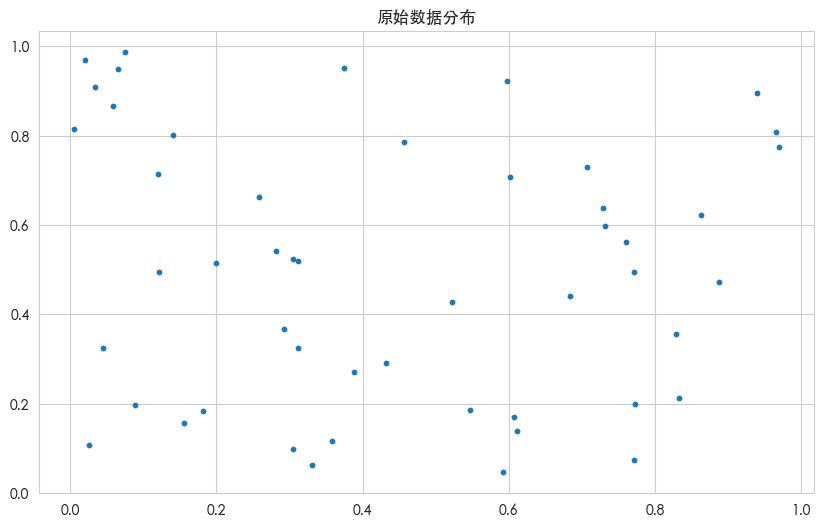

孤立森林检测到的异常值数量: 5
异常值占比: 10.00%


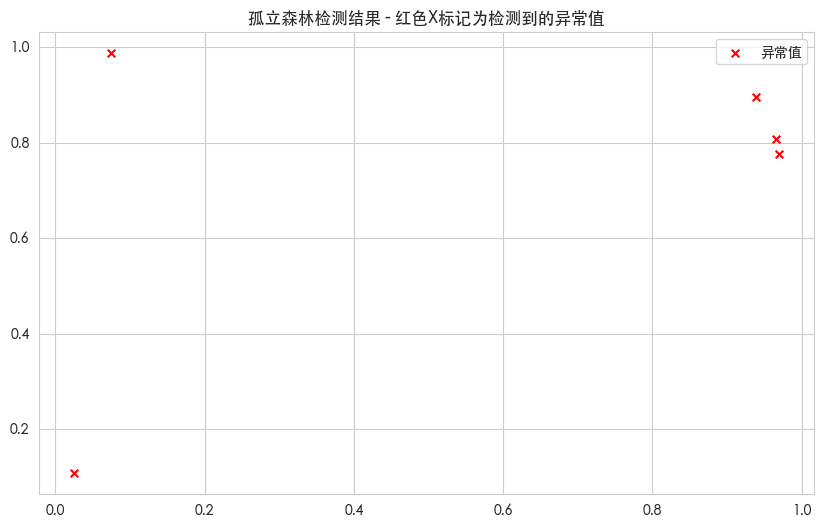


移除异常值后的数据形状: (45, 2)
原始数据形状: (50, 2)


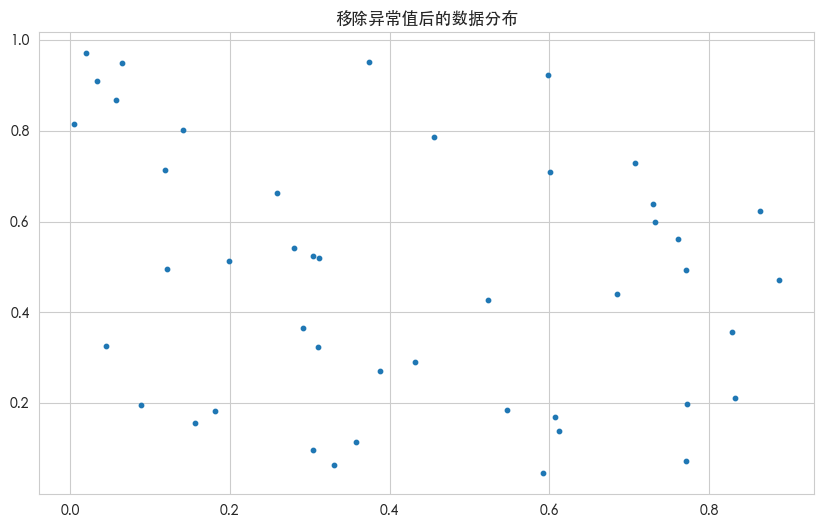

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import pandas as pd

# 随机生成50个数据点
np.random.seed(42)  # 为了结果的可重复性设置随机种子
X = np.random.rand(50, 2)  # 2维数据,2列好画图来解释

# 创建DataFrame方便后续处理
df_iforest = pd.DataFrame(X, columns=['x', 'y'])

# 绘制原始数据分布
plt.figure(figsize=(10, 6))
plt.scatter(df_iforest['x'], df_iforest['y'], s=10)
plt.title('原始数据分布')
plt.grid(True)
plt.show()

# 使用孤立森林检测异常值
# contamination: 预期的异常值比例
# random_state: 随机种子，确保结果可重复
# n_estimators: 树的数量
"""Return the anomaly score of each sample using the IsolationForest algorithm  The IsolationForest 'isolates' observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.  Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.  This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.  Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies."""
# IsolationForest: shorter path length for anomalies.
# contamination: expected proportion of outliers in the data set.
iforest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
# fit_predict返回1表示正常，-1表示异常
predictions = iforest.fit_predict(X)


#创建两个布尔数组（True/False）来标记异常和正常点。
outliers_mask = predictions == -1
inliers_mask = predictions == 1


# 统计异常值数量
outliers_count = np.sum(outliers_mask)
print(f"孤立森林检测到的异常值数量: {outliers_count}")
print(f"异常值占比: {outliers_count / len(X):.2%}")

# 绘制检测结果，突出显示异常值
plt.figure(figsize=(10, 6))
# X is 2d array, so we need to specify the rows and columns using[ ],whose first element is the row index and second element is the column index. since inliers_mask is a boolean array, so we get all rows with True value.  and we choose the first column,0 index;
# plt.scatter(X[inliers_mask, 0], X[inliers_mask, 1], c='blue', s=10, label='正常数据点')
plt.scatter(X[outliers_mask, 0], X[outliers_mask, 1], c='red', s=30, marker='x', label='异常值')
plt.title('孤立森林检测结果 - 红色X标记为检测到的异常值')
plt.legend()
plt.grid(True)
plt.show()

# 移除异常值后的数据

df_iforest_cleaned = df_iforest[inliers_mask].copy()
print(f"\n移除异常值后的数据形状: {df_iforest_cleaned.shape}")
print(f"原始数据形状: {df_iforest.shape}")

# 绘制移除异常值后的数据
plt.figure(figsize=(10, 6))
plt.scatter(df_iforest_cleaned['x'], df_iforest_cleaned['y'], s=10)
plt.title('移除异常值后的数据分布')
plt.grid(True)
plt.show()


In [56]:
X


array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848],
       [0.15601864, 0.15599452],
       [0.05808361, 0.86617615],
       [0.60111501, 0.70807258],
       [0.02058449, 0.96990985],
       [0.83244264, 0.21233911],
       [0.18182497, 0.18340451],
       [0.30424224, 0.52475643],
       [0.43194502, 0.29122914],
       [0.61185289, 0.13949386],
       [0.29214465, 0.36636184],
       [0.45606998, 0.78517596],
       [0.19967378, 0.51423444],
       [0.59241457, 0.04645041],
       [0.60754485, 0.17052412],
       [0.06505159, 0.94888554],
       [0.96563203, 0.80839735],
       [0.30461377, 0.09767211],
       [0.68423303, 0.44015249],
       [0.12203823, 0.49517691],
       [0.03438852, 0.9093204 ],
       [0.25877998, 0.66252228],
       [0.31171108, 0.52006802],
       [0.54671028, 0.18485446],
       [0.96958463, 0.77513282],
       [0.93949894, 0.89482735],
       [0.59789998, 0.92187424],
       [0.0884925 , 0.19598286],
       [0.04522729, 0.32533033],
       [0.

In [57]:
inliers_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False])

In [58]:
X[inliers_mask]

array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848],
       [0.15601864, 0.15599452],
       [0.05808361, 0.86617615],
       [0.60111501, 0.70807258],
       [0.02058449, 0.96990985],
       [0.83244264, 0.21233911],
       [0.18182497, 0.18340451],
       [0.30424224, 0.52475643],
       [0.43194502, 0.29122914],
       [0.61185289, 0.13949386],
       [0.29214465, 0.36636184],
       [0.45606998, 0.78517596],
       [0.19967378, 0.51423444],
       [0.59241457, 0.04645041],
       [0.60754485, 0.17052412],
       [0.06505159, 0.94888554],
       [0.30461377, 0.09767211],
       [0.68423303, 0.44015249],
       [0.12203823, 0.49517691],
       [0.03438852, 0.9093204 ],
       [0.25877998, 0.66252228],
       [0.31171108, 0.52006802],
       [0.54671028, 0.18485446],
       [0.59789998, 0.92187424],
       [0.0884925 , 0.19598286],
       [0.04522729, 0.32533033],
       [0.38867729, 0.27134903],
       [0.82873751, 0.35675333],
       [0.28093451, 0.54269608],
       [0.